# Human and AI in Partnership for Low-code Blog Authoring Automation

We want to reimagine the blog authoring experience powered by AI. [AuthorAI](https://github.com/authorai/) objective is to augment blog authoring activities with AI so that the blog author can save time authoring posts, enable more "creative focus" for the author, increase "flow" for the author leading to publishing more posts as a result, and ultimately leading to more eyeballs and monetization benefits. 

Today with the launch of ChatGPT from OpenAI entire blog posts can be generated by an AI. The challenge with this approach is that the human author involvement is negligible. We want to take the best of human-AI partnership approach with AuthorAI. We want AI to augment the authoring process guided by human author opinions, enhancing creative focus, and increasing authoring flow.

That is why we created this notebook. We want to share our journey in creating a Python library AuthorAI Blogger which can be used for "human and AI in partnership for low-code blog authoring automation". We are sharing this notebook in a tutorial style so that others can join the exploration. The tutorial walks through basics of API design and OpenAI. Another objective of this notebook is to act as an interactive documentation and playground for the AuthorAI library.

## Authoring Flow

The flow we are expecting to achieve with AuthorAI is as follows:
Ideate => Research (Topic) => Write (Title, Tags) => Enhance (Q&A, Quote) => Illustrate (Feature Image) => Publish
1. **Ideate:** AI combines concepts human provides and generates blog post ideas. Human selects the best idea
3. **Research:** AI generates topic description based on the idea. Human iterates few variations of topic descriptions generated and choose the most appropriate
4. **Write:** This step involves AI helping identify an SEO friendly title for the post and tags based on the topic. AI could further help in grammar correction, research, generating code, and other activities, which are not included in current scope.
5. **Enhance:** We can further enhance the blog post with Fequently Asked Questions, Leaderboard, and Quotable Quotes also generated by AI.
6. **Illustrate:** We are then ready to generate custom illustrations or imagery for our post using AI. This we believe is the coolest part of the process!
7. **Publish:** We are automating the post publishing by generating HTML and Markdown. AI could help further by generating layout templates, code for value added micro-apps for the blog post like a custom chatbot, and so on. This is not in scope at the moment.


## Structure of this Notebook
We have built the AuthorAI API with somewhat opinionated defaults (e.g., generate tags as only single word nouns) to make the API usage as intuitive as possible and keep it low code. This also enables automation using single call the API to generate an entire blog post. The notebook tests this API out on an example. We have purposely created the notebook with default options simulating the human opinions so that you can run the example 100% using the AI and simulation. This exhibits AI's current state of the art and encourages debate around what is the evolved role of an author if AI can automate to this extent. This notebook demonstrates creation of a relatively complex blog post with title, subtitle, tags, topic content, feature image, questions and answers, quotable quote, and leaderboard of top X entities, in HTML and Markdown formats using only 11 API calls, almost one API call per blog feature.

The paradox this presents is the unfortunate possibility of misuse, where AI can be used to generate "realistic" blogs which seem to be human written. It is somewhat "addictive" to re-run the notebook several times to see what unique variations does the AI generate with only three simple words (or fewer, or more) as seed input! Can the reader think of ways this automation can be put to good use - like an **exploratory online education** or an **infinite digital museum** or **visual search results**?

## AuthorAI API
Let us introduce the AuthorAI API. We start with choice of dependencies or technologies which enable AuthorAI. We use [OpenAI](https://openai.com/) as the "brains" of AuthorAI. Specifically, we use GPT3 Large Language Model which powers the famous ChatGPT. Next we import a few utility libraries to perform file operations and cleanup of results. Finally we rely on libraries for image, HTML, and markdown.

In [1]:
from authorai import blogger

### No-code Auto Generation
We start with a "no-code" demo of the API where we generate the entire blog post with a single API call. The post image and html file will be stored in the same folder as this notebook.

In [2]:
keywords = ['Mars', 'Earth', 'Travel']
image_file, html_file, md_file = blogger.auto_generate(keywords=keywords, folder='generated')
print('Auto Generated image: ', image_file)
print('Auto Generated html: ', html_file)
print('Auto Generated markdown: ', md_file)

Auto Generated image:  Missions to explore Mars by space agencies 20221222122159.png
Auto Generated html:  Mars-Earth-Travel-20221222122200.html
Auto Generated markdown:  Mars-Earth-Travel-20221222122200.md


### Low-code Authoring Flow
This section demonstrates the authoring flow enabled by AuthorAI API. We start by initializing a post object from the BlogPost class. We will use this to store completions returned by our authoring flow and publish the post in the end of this demo.

In [3]:
post = blogger.BlogPost()

In [4]:
post.set_keywords(keywords)

Set `auto` value to `True` when using AI for auto generating the entire blog without any human author partnership. This adds a disclaimer on top of the generated HTML that this is an AI generated page.

In [5]:
post.set_auto(True)

Set this `full_feature` value to `True` when generating blog post layout with full feature 1024x1024 image. Otherwise the feature image is 356x356 left aligned to topic text.

In [6]:
post.set_full_feature(False)

### Ideate
To begin our authoring flow, we first start by brainstorming 10 ideas based on few concepts we are thinking for our next blog post. As we are using high value for `temperature` parameter by default, we can re-run this API (notebook cell) and evaluate creative variations of completion results, before we pick the best one for continuing our authoring flow. We have noticed that three concepts which are seemingly unrelated or somewhat related generate more creative ideas than two concepts which are more related.

In [7]:
response, response_list = blogger.concepts_combining_keywords(post.get_keywords())
print(response)

1. Mars-Earth Interstellar Travel
2. Interplanetary Spaceway Between Mars and Earth
3. Martian-Earth Shuttle Service
4. Interplanetary Cruise Line
5. Interplanetary Space Station
6. Martian-Earth Tourism
7. Martian-Earth Spaceflight Experiences
8. Interplanetary Transport Service
9. Interplanetary Transportation Hub
10. Mars-Earth Intergalactic Journeys


Next we select one of the ideas we like and save this in our post object. Just replace the `randrange(len(response_list)-1)` random number generator placeholder for auto-demo with an integer from 0-9, noting that Python list numbering starts with 0 so relates to 1 in the completion result list, 1 is 2, and so on.

In [8]:
post.set_concept(response_list[3])
print(post.get_concept())

Interplanetary Cruise Line


### Research
Now we are ready to use GPT3 as a research tool. We can research the idea we just selected and describe it as a topic for our blog post. Note the token limits described in prior section. Grade level 10 produces more "adult written" English than grade level 2. You can experiment with words and grade to settle on a variation that satisfies your blog content length and audience. 
> Future releases of the AuthorAI API will introduce editing features so that you can edit and add your own content as well as use the AI to auto-complete partial edits.

In [9]:
topic = blogger.describe_concept(post.get_concept(), words=200, grade=10)
post.set_topic(topic)
print(post.get_topic())

Interplanetary Cruise Line is a concept that involves taking people on a journey through space. It would involve a spacecraft that would take passengers to different planets and moons in our solar system. The spacecraft would be equipped with the latest technology, allowing passengers to experience the wonders of space travel in comfort and safety. Passengers would be able to view the planets and moons from the spacecraft, as well as take part in activities such as spacewalks and simulated landings. The spacecraft would also be equipped with a variety of amenities, such as restaurants, bars, and entertainment venues. The cruise line would also offer educational opportunities, such as lectures and seminars on the science and history of space exploration. The Interplanetary Cruise Line would be a unique and exciting way to explore the universe, and would provide a once-in-a-lifetime experience for those who take part.


### Write
Next step in the authoring flow is to take the topic we described above and generate catchy, SEO friendly titles for our blog post. Note the difference between ideas generated and post titles. All the magic is in the prompt engineering.

In [10]:
response, response_list = blogger.titles_from_topic(post.get_topic())
print(response)

1. "Unlock the Wonders of Space: Take a Trip on the Interplanetary Cruise Line"
2. "Experience Outer Space In Comfort With the Interplanetary Cruise Line"
3. "Explore the Solar System: Join the New Interplanetary Cruise Line"
4. "Take the Ultimate Journey: Join the Interplanetary Cruise Line"
5. "Take a Cruise Through the Stars: Explore Space on the Interplanetary Cruise Line"
6. "Learn and Explore Onboard the Interplanetary Cruise Line"
7. "Visit Other Solar Systems on the Interplanetary Cruise Line"
8. "See the Universe in Style: Book Your Trip on the Interplanetary Cruise Line"
9. "Embark on a Journey of Discovery With the Interplanetary Cruise Line"
10. "Discover New Worlds With the Interplanetary Cruise Line: An Out-of-this-World Experience"


You can replace the `randrange` random generator with a number to choose your title.

In [11]:
post.set_title(response_list[5])
print(post.get_title())

"Learn and Explore Onboard the Interplanetary Cruise Line"


Same way we can also generate tags from the topic.

In [12]:
response, response_list = blogger.tags_from_topic(post.get_topic())
post.set_tags(response_list)
print(post.get_tags())

['Spacecraft ', 'Planets ', 'Moons ', 'Spacewalks ', 'Landings ', 'Restaurants ', 'Bars ', 'Entertainment Venues ', 'Lectures ', 'Seminars']


### Enhance
Now we are ready to enhance our blog post with more features, starting with Questions and Answers. You can replace the question with your own. It is not required to associate the question with the tags as we have done for the Auto-Demo. Framing the question based on the topic will help generate completions which are relevant for the blog. You are also not limited to only three question-answer pairs, go for more or fewer as required for your blog post.

Note that the way the first question combines two tags into a concept is a good test of truthful completions. Sometimes the combined concepts are not real concepts. GPT3 completion recognizes these.

In [13]:
question = 'Is this concept ' + post.get_tags()[3] + ' ' + post.get_tags()[1] +  ' a thing?'
post.set_qna(question, blogger.qna(question))

In [14]:
question = 'What is the importance of ' + post.get_tags()[5] + '?'
post.set_qna(question, blogger.qna(question))

In [15]:
question = 'Is there a relationship between ' + post.get_tags()[2] + ' and ' + post.get_tags()[7]  + '?'
post.set_qna(question, blogger.qna(question))
print(post.get_qna())

{'Is this concept Spacewalks  Planets  a thing?': 'No, the concept of spacewalks and planets is not a thing. Spacewalks are activities conducted by astronauts outside of a spacecraft in outer space, while planets are large bodies in space that orbit a star.', 'What is the importance of Restaurants ?': 'Restaurants are important for providing people with access to a variety of food and drinks, as well as a place to socialize and relax. Restaurants also provide employment opportunities for people in the hospitality industry, and can be a major source of revenue for local economies.', 'Is there a relationship between Moons  and Entertainment Venues ?': 'There is no direct relationship between moons and entertainment venues. However, the phases of the moon can affect the atmosphere of an entertainment venue, as many people believe that the full moon can bring out more energy and excitement in people.'}


Another feature AuthorAI API supports is leaderboard of top X recommendations based on the topic and entity of your choice. 
> Future releases of the leaderboard API will include affiliate linking capability to help monetize your blog.

In [16]:
response, reponse_list = blogger.leaderboard(topic, 'Movies', count=5)
post.set_leaderboard('Movies', response)

In [17]:
response, reponse_list = blogger.leaderboard(topic, 'Music Albums', count=5)
post.set_leaderboard('Music Albums', response)

In [18]:
response, reponse_list = blogger.leaderboard(topic, 'Famous People', count=5)
post.set_leaderboard('Famous People', response)
print(post.get_leaderboard())

{'Movies': '1. Gravity (2013)\n2. Interstellar (2014)\n3. The Martian (2015)\n4. Apollo 13 (1995)\n5. Wall-E (2008)', 'Music Albums': '1. "Space Explorer" by Astral Projection \n2. "Voyage to the Planets" by Celestial Odyssey \n3. "The Launch" by Deep Space Nine \n4. "Interstellar Travelers" by Hyperdrive \n5. "Galactic Voyage" by Intergalactic Riders', 'Famous People': '1. Neil Degrasse Tyson\n2. Sally Ride\n3. Elon Musk\n4. Stephen Hawking\n5. Yuri Gagarin'}


You can further enhance your blog post with a relevant quotable quote.

In [19]:
quote_text = blogger.quote(post.get_topic())
post.set_quote(quote_text)
print(post.get_quote())

"The limits of our exploration are bounded only by our imagination." - Christina Koch, NASA astronaut


### Illustrate
We are now ready to add some life to the text in our blog post. We first generate an image description from topic.

In [20]:
image_description = blogger.strip_filename(blogger.summarize(post.get_topic(), words=10))
print(image_description)

Interplanetary Cruise Line offers space exploration adventure


Next we use the DALL.E Image generation API to create an image appropriate for our blog. We can then save the image to a local file and add it as feature image to our blog post object.

In [21]:
image_url=blogger.image_from_description('a 3d photo realistic painting of topic ' + image_description)

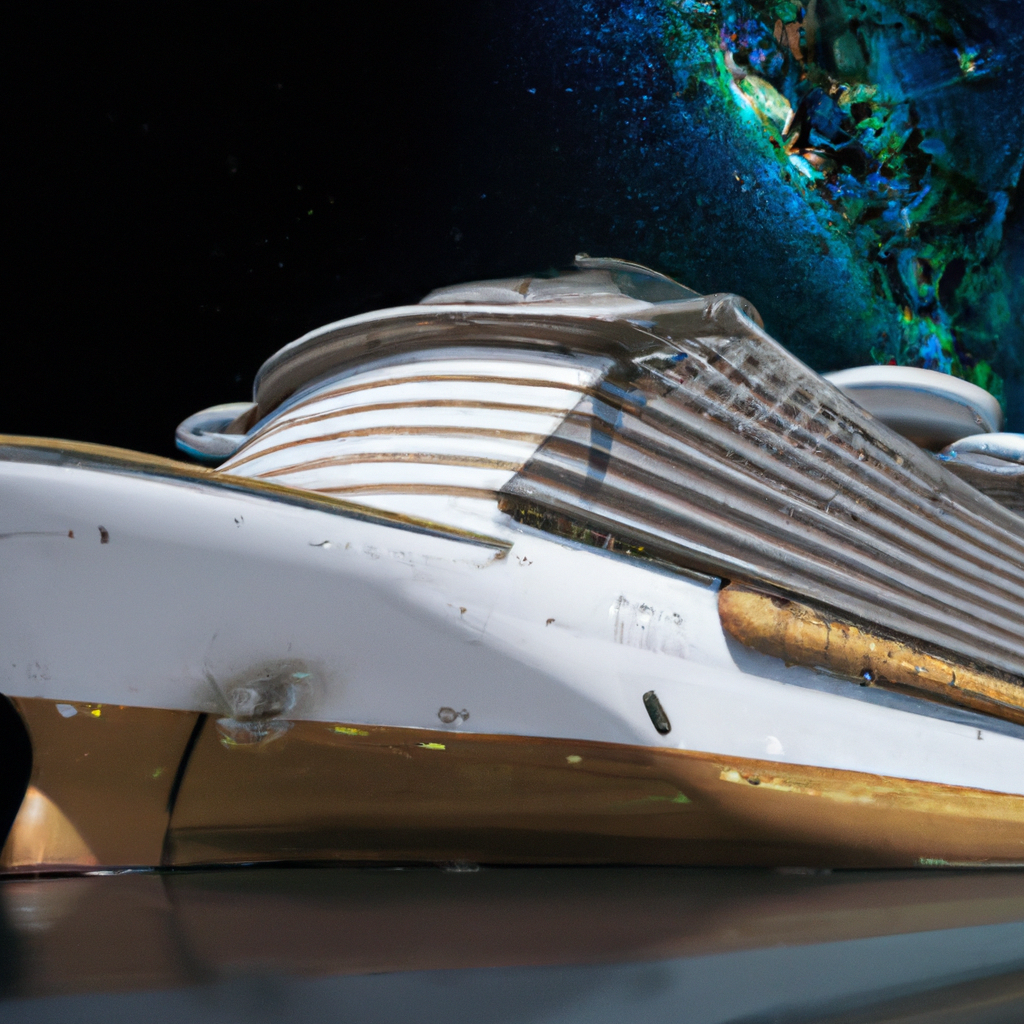

In [27]:
from IPython.display import Image

local_image = blogger.save_image(url=image_url, description=image_description, folder='generated')
post.set_feature_image(local_image)
Image(filename='generated/' + local_image)

### Publish
Final step in our authoring flow is to generate the blog post as HTML. Note that for Auto-Demo we have attempted to keep the text and features of the blog post minimal to avoid a scrolling output. Some of the styles of the generated HTML conflict with the Jupyter Notebook styles so the notebook rendered HTML may not look same as browser rendered.

> This last step is somewhat magical in the Auto-Demo mode. Re-run the notebook a few times to see that no two blog posts are exactly the same, ever!

Our final step is to generate a local copy of HTML and Markdown formats of the blog post so that we can integrate this will our blog system of choice.

NOTE: When rendering the HTML in Jupyter notebook the image won't show up as it looks for a local copy of the image instead of resolving to the `generated` folder. View the generated HTML in brower to see the complete post with image.

In [23]:
from IPython.core.display import HTML
post_html = blogger.generate_html(post)
HTML(post_html)

In [24]:
html_path, markdown_path = blogger.publish(post_html=post_html, 
                                           filename='-'.join(post.get_keywords()), 
                                           folder='generated')